In [1]:
import tifffile
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os
import pickle

# from jupyterthemes import jtplot
# jtplot.style(theme='oceans16')

In [2]:
fov_list = ["000", "001", "003", "004", "005", "007", "008", "009", 
            "010", "011", "012", "013", "014", "015", "016", "017", "018", "019",
            "020", "021", "022", "023", "024", "025", "026", "027", "028", "029",
            "030", "031"]

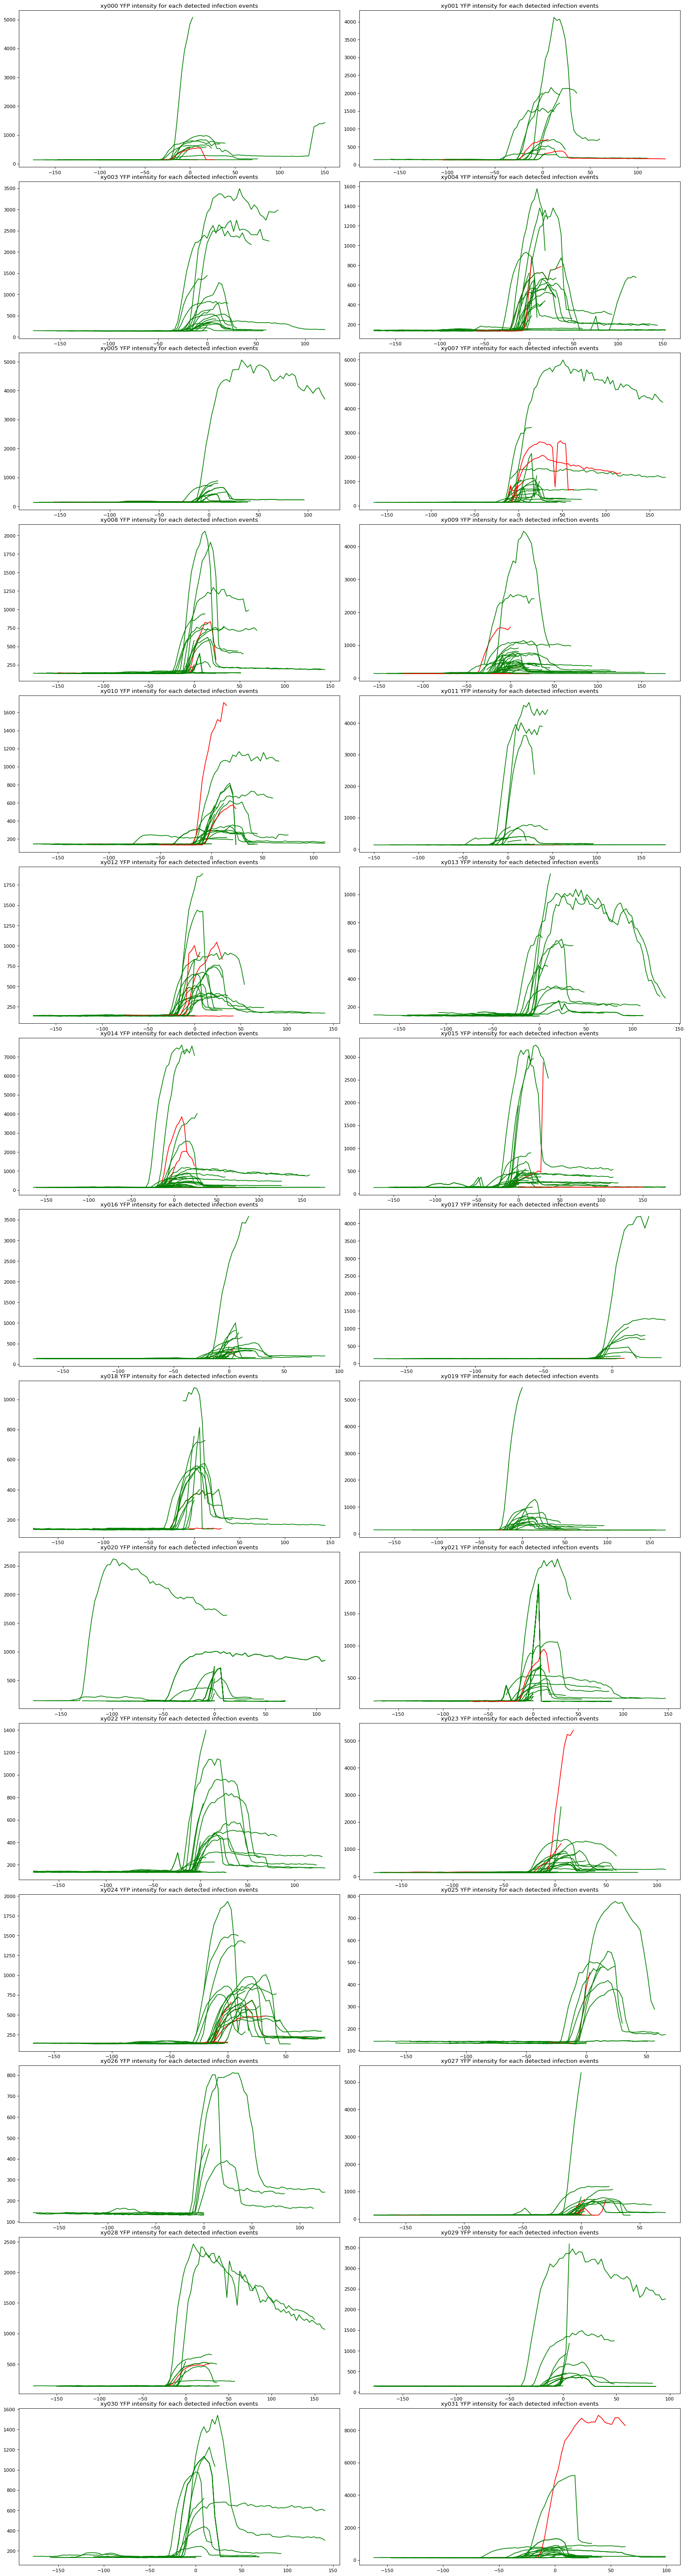

In [3]:
subplots = len(fov_list)
cols = 2
rows = round(np.ceil(subplots / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, dpi=80, figsize=(20, subplots/4 * 10))
fig.tight_layout()
axes_flat = axes.flatten()
i = 0
for fov in fov_list:
    FOV_dir = "G:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    yfp_dir = FOV_dir + "YFP_axis\\"
    t_dir = FOV_dir + "t_axis\\"
    files = [f for f in os.listdir(yfp_dir) if os.path.isfile(os.path.join(yfp_dir, f))]
    for file in files:
        lysis = file.split("lysis")[-1][:-4]
        yfp = np.load(yfp_dir + file)
        time = np.load(t_dir + file)
        if lysis == "True":
            axes_flat[i].plot(time, yfp, 'red')
        else:
            axes_flat[i].plot(time, yfp, 'green')
    axes_flat[i].set_title(f"xy{fov} YFP intensity for each detected infection events")
    i += 1
plt.show()

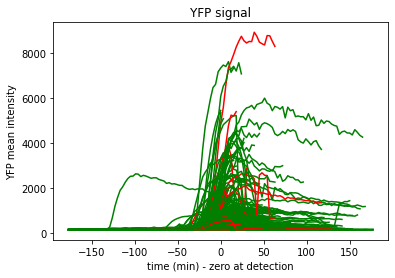

In [4]:
for fov in reversed(fov_list):
    FOV_dir = "G:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    yfp_dir = FOV_dir + "YFP_axis\\"
    t_dir = FOV_dir + "t_axis\\"
    files = [f for f in os.listdir(yfp_dir) if os.path.isfile(os.path.join(yfp_dir, f))]
    for file in files:
        lysis = file.split("lysis")[-1][:-4]
        yfp = np.load(yfp_dir + file)
        time = np.load(t_dir + file)
        if lysis == "True":
            plt.plot(time, yfp, 'red')
        else:
            plt.plot(time, yfp, 'green')
plt.xlabel("time (min) - zero at detection")
plt.ylabel("YFP mean intensity")
plt.title("YFP signal")
# plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\yfp')
plt.show()

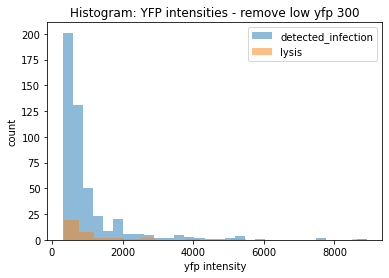

In [6]:
yfp_inten_infec = []
yfp_inten_lysis = []
for fov in reversed(fov_list):
    FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    yfp_dir = FOV_dir + "YFP_axis\\"
    t_dir = FOV_dir + "t_axis\\"
    files = [f for f in os.listdir(yfp_dir) if os.path.isfile(os.path.join(yfp_dir, f))]
    for file in files:
        lysis = file.split("lysis")[-1][:-4]
        yfp = np.load(yfp_dir + file)
        if max(yfp) >= 300:
            yfp_inten_infec.append(max(yfp))
            if lysis == "True":
                yfp_inten_lysis.append(max(yfp))
plt.hist(yfp_inten_infec, alpha=0.5, label='detected_infection', bins=30)
plt.hist(yfp_inten_lysis, alpha=0.5, label='lysis', bins=20)
plt.legend()
plt.xlabel("yfp intensity")
plt.ylabel("count")
plt.title("Histogram: YFP intensities - remove low yfp 300")
# plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\yfp_hist_infection_no_low')
plt.show()

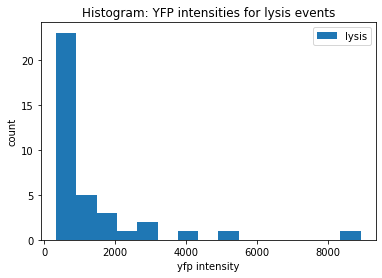

In [10]:
plt.hist(yfp_inten_lysis, alpha=1, label='lysis', bins=15)
plt.legend()
plt.xlabel("yfp intensity")
plt.ylabel("count")
plt.title("Histogram: YFP intensities for lysis events")
plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\yfp_hist_lysis')
plt.show()

In [12]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('YFP intensity')

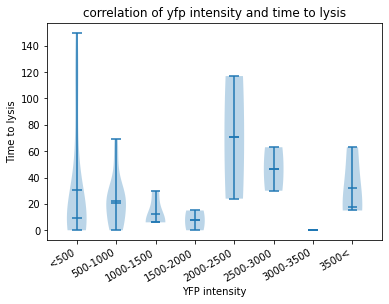

In [14]:
t_yfp_500 = []
f_lysis_500 = []
t_yfp_1000 = []
f_lysis_1000 = []
t_yfp_1500 = []
f_lysis_1500 = []
t_yfp_2000 = []
f_lysis_2000 = []
t_yfp_2500 = []
f_lysis_2500 = []
t_yfp_3000 = []
f_lysis_3000 = []
t_yfp_3500 = []
f_lysis_3500 = []
t_yfp_higher = []
f_lysis_higher = []
for fov in reversed(fov_list):
    FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    yfp_dir = FOV_dir + "YFP_axis\\"
    t_dir = FOV_dir + "t_axis\\"
    files = [f for f in os.listdir(yfp_dir) if os.path.isfile(os.path.join(yfp_dir, f))]
    for file in files:
        lysis = file.split("lysis")[-1][:-4]
        yfp = np.load(yfp_dir + file)
        time = np.load(t_dir + file)
        if max(yfp) < 500:
            if lysis == "True":
                t_yfp_500.append(max(time))
                f_lysis_500.append(1)
            else:
                f_lysis_500.append(0)
        elif max(yfp) < 1000:
            if lysis == "True":
                t_yfp_1000.append(max(time))
                f_lysis_1000.append(1)
            else:
                f_lysis_1000.append(0)
        elif max(yfp) < 1500:
            if lysis == "True":
                t_yfp_1500.append(max(time))
                f_lysis_1500.append(1)
            else:
                f_lysis_1500.append(0)
        elif max(yfp) < 2000:
            if lysis == "True":
                t_yfp_2000.append(max(time))
                f_lysis_2000.append(1)
            else:
                f_lysis_2000.append(0)
        elif max(yfp) < 2500:
            if lysis == "True":
                t_yfp_2500.append(max(time))
                f_lysis_2500.append(1)
            else:
                f_lysis_2500.append(0)
        elif max(yfp) < 3000:
            if lysis == "True":
                t_yfp_3000.append(max(time))
                f_lysis_3000.append(1)
            else:
                f_lysis_3000.append(0)
        elif max(yfp) < 3500:
            if lysis == "True":
                t_yfp_3500.append(max(time))
                f_lysis_3500.append(1)
            else:
                f_lysis_3500.append(0)
        else:
            if lysis == "True":
                t_yfp_higher.append(max(time))
                f_lysis_higher.append(1)
            else:
                f_lysis_higher.append(0)

fig, ax = plt.subplots()
D = [t_yfp_500, t_yfp_1000, t_yfp_1500, t_yfp_2000, t_yfp_2500, t_yfp_3000, t_yfp_3500, t_yfp_higher]
for i in range(len(D)):
    if len(D[i]) == 0:
        D[i] = [0]
vp = ax.violinplot(D, showmeans=True, showmedians=True, showextrema=True)

ax.set_title('correlation of yfp intensity and time to lysis')
ax.set_ylabel('Time to lysis')
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500<']
set_axis_style(ax, labels)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\yfp_violin_timetolysis')
plt.show()

[0.08529411764705883, 0.075, 0.08163265306122448, 0.07407407407407407, 0.2, 0.2222222222222222, 0.0, 0.15]


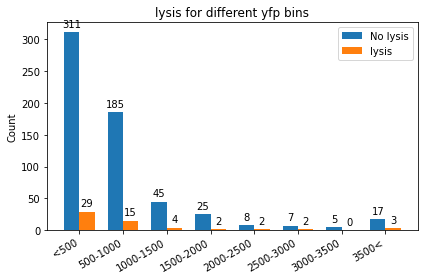

In [15]:
lysis = [f_lysis_500.count(1), f_lysis_1000.count(1), f_lysis_1500.count(1), f_lysis_2000.count(1),
         f_lysis_2500.count(1), f_lysis_3000.count(1), f_lysis_3500.count(1), f_lysis_higher.count(1)]
no_lysis = [f_lysis_500.count(0), f_lysis_1000.count(0), f_lysis_1500.count(0), f_lysis_2000.count(0),
            f_lysis_2500.count(0), f_lysis_3000.count(0), f_lysis_3500.count(0), f_lysis_higher.count(0)]
f = []
for l, nl in zip(lysis, no_lysis):
    f.append(l / (l + nl))

print(f)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_lysis, width, label='No lysis')
rects2 = ax.bar(x + width/2, lysis, width, label='lysis')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('lysis for different yfp bins')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

fig.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\lysis_and_nolysis')
plt.show()

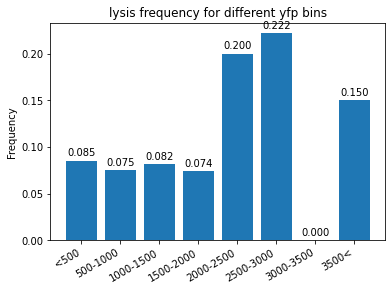

In [32]:
fig, ax = plt.subplots()
rects = ax.bar(labels, f)
ax.bar_label(rects, padding=3, fmt="%.3f")
ax.set_ylabel('Frequency')
ax.set_title('lysis frequency for different yfp bins')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# fig.tight_layout()

fig.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\lysis_frequency')
plt.show()

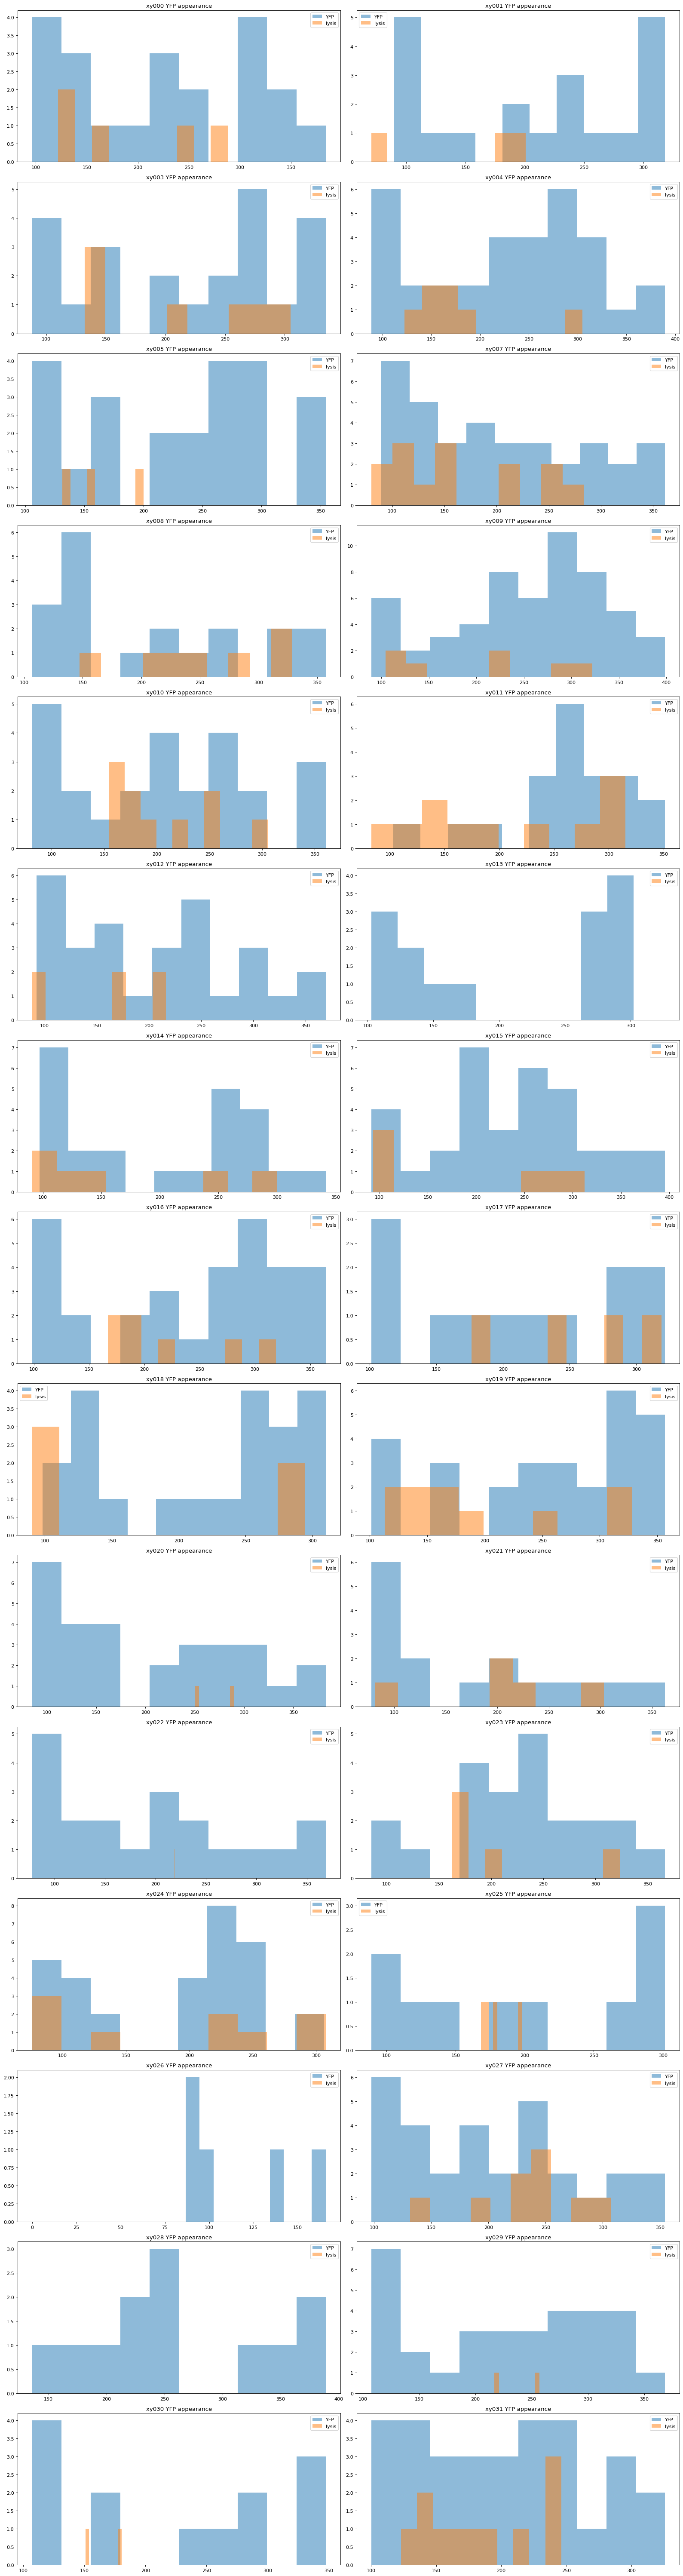

In [17]:
subplots2 = len(fov_list)
cols = 2
rows = round(np.ceil(subplots2 / cols))
fig2, axes2 = plt.subplots(nrows=rows, ncols=cols, dpi=80, figsize=(20, subplots/4 * 10))

axes_flat2 = axes2.flatten()
i = 0
for fov in fov_list:
    FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    with open(FOV_dir + 'all_lineage', 'rb') as pickle_file:
        lineages_dict = pickle.load(pickle_file)
        YFP_loc = []
        lysis_loc = []
        for key in lineages_dict:
            for line in lineages_dict[key]:
                if max(line.reporter_intensities) >= 300:
                    YFP_loc.append(np.mean([c[1] for c in line.positions]))
                if line.lyse:
                    lysis_loc.append(np.mean([c[1] for c in line.positions]))
        axes_flat2[i].hist(YFP_loc, alpha=0.5, label='YFP')
        axes_flat2[i].hist(lysis_loc, alpha=0.5, label='lysis')
        axes_flat2[i].set_title(f"xy{fov} YFP appearance")
        axes_flat2[i].legend()
        i += 1
fig2.tight_layout()
plt.show()

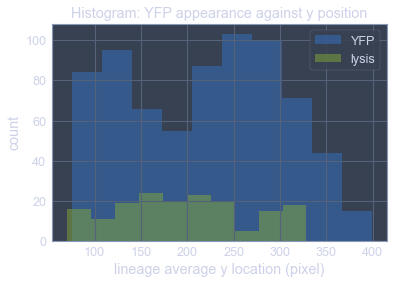

In [6]:
YFP_loc = []
lysis_loc = []
for fov in fov_list:
    FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    with open(FOV_dir + 'all_lineage', 'rb') as pickle_file:
        lineages_dict = pickle.load(pickle_file)
        for key in lineages_dict:
            for line in lineages_dict[key]:
                if max(line.reporter_intensities) >= 300:
                    YFP_loc.append(np.mean([c[1] for c in line.positions]))
                if line.lyse:
                    lysis_loc.append(np.mean([c[1] for c in line.positions]))
plt.hist(YFP_loc, alpha=0.5, label='YFP')
plt.hist(lysis_loc, alpha=0.5, label='lysis')
plt.legend()
plt.xlabel("lineage average y location (pixel)")
plt.ylabel("count")
plt.title("Histogram: YFP appearance against y position")
plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\y_position')
plt.show()

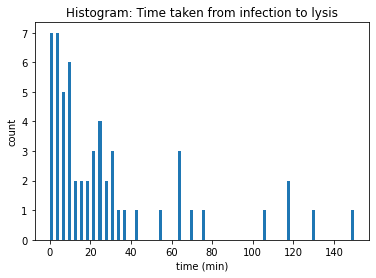

In [8]:
inf_to_lysis = []
for fov in fov_list:
    FOV_dir = "G:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    yfp_dir = FOV_dir + "YFP_axis\\"
    t_dir = FOV_dir + "t_axis\\"
    files = [f for f in os.listdir(yfp_dir) if os.path.isfile(os.path.join(yfp_dir, f))]
    for file in files:
        lysis = file.split("lysis")[-1][:-4]
        yfp = np.load(yfp_dir + file)
        time = np.load(t_dir + file)
        if lysis == "True":
            inf_to_lysis.append(time[-1])
plt.hist(inf_to_lysis, bins=100)
plt.xlabel("time (min)")
plt.ylabel("count")
plt.title("Histogram: Time taken from infection to lysis")
# plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\time_to_lysis')
plt.show()

In [ ]:
YFP = []
lysis_yfp = []
for fov in fov_list:
    FOV_dir = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\FOV{}\\".format(fov)
    with open(FOV_dir + 'all_lineage', 'rb') as pickle_file:
        lineages_dict = pickle.load(pickle_file)
        for key in lineages_dict:
            for line in lineages_dict[key]:
                if max(line.reporter_intensities) >= 300:
                    YFP.append(np.mean([c for c in line.reporter_intensities]))
                    if line.lyse:
                        lysis_yfp.append(np.mean([c for c in line.reporter_intensities]))
plt.hist(YFP, alpha=0.5, label='YFP')
plt.hist(lysis_yfp, alpha=0.5, label='YFP_lysis')
plt.legend()
plt.xlabel("lineage average YFP when it exceeds 300")
plt.ylabel("count")
plt.title("Histogram: YFP intensities and those with lysis")
plt.savefig('F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\all_yfp_intensity')
plt.show()

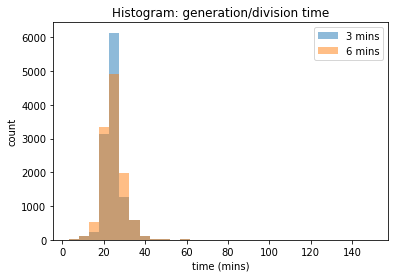

In [3]:
residence_t1 = []
residence_t2 = []
for fov in fov_list:
    FOV_dir = "F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\FOV{}\\".format(fov)
    with open(FOV_dir + 'all_lineage', 'rb') as pickle_file:
        lineages_dict = pickle.load(pickle_file)
        for key in lineages_dict:
            for line in lineages_dict[key]:
                if line.daughters[1] and line.parent:
                    if not line.highlight and not line.lyse:
                        residence_t1.append(line.resident_time[-1] - line.parent.resident_time[-1])
                        residence_t2.append(line.resident_time[::2][-1] - line.parent.resident_time[::2][-1])
plt.hist(residence_t1, bins=30, alpha=0.5, label='3 mins')
plt.hist(residence_t2, bins=30, alpha=0.5, label='6 mins')
plt.legend()
plt.xlabel("time (mins)")
plt.ylabel("count")
plt.title("Histogram: generation/division time")
plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\div_times')
plt.show()

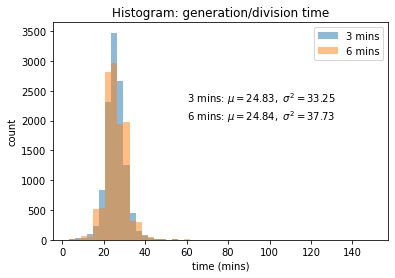

In [22]:
plt.hist(residence_t1, bins=50, alpha=0.5, label='3 mins')
plt.hist(residence_t2, bins=50, alpha=0.5, label='6 mins')
plt.legend()
plt.xlabel("time (mins)")
plt.ylabel("count")
plt.title("Histogram: generation/division time")

mean1 = np.mean(residence_t1)
mean2 = np.mean(residence_t2)
var1 = np.var(residence_t1)
var2 = np.var(residence_t2)

plt.text(60, 2000, f'3 mins: $\mu={mean1:.2f},\ \sigma^2={var1:.2f}$ \n6 mins: $\mu={mean2:.2f},\ \sigma^2={var2:.2f}$')
plt.savefig('F:\\Cambridge\\MENG\\UROP2022\\Data\\MMLT\\presentation\\Phage_YFP_Growth\\div_times')
plt.show()
